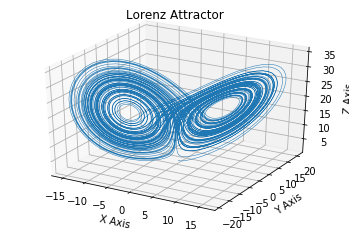

In [19]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 15 10:33:10 2018

@author: andrewbelmonte
"""

# Plot of the Lorenz Attractor based on Edward Lorenz's 1963 "Deterministic
# Nonperiodic Flow" publication.
# http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2
#
# Note: Because this is a simple non-linear ODE, it would be more easily
#       done using SciPy's ode solver, but this approach depends only
#       upon NumPy.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pylab import *



def lorenz(x, y, z, s=10, r=20, b=8/3): # s=10, r=28, b=8/3
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
stepCnt = 10000 # 10000

# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

savefig("Lorenz",fmt="png",bbox_inches='tight', pad_inches=0.03,dpi=300)

plt.show()

### Model Logistic

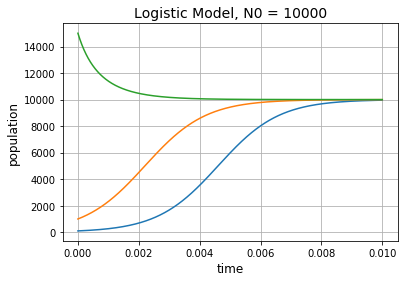

In [22]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 15 10:33:10 2018

@author: andrewbelmonte
"""

# Plot of the Lorenz Attractor based on Edward Lorenz's 1963 "Deterministic
# Nonperiodic Flow" publication.
# http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2
#
# Note: Because this is a simple non-linear ODE, it would be more easily
#       done using SciPy's ode solver, but this approach depends only
#       upon NumPy.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from pylab import *


def Growth(N, N0, mu): # s=10, r=28, b=8/3

#    mu = mu0 + mu1*rand(1)
    
    N_dot = mu*N*(N0 - N)
    return N_dot



# NUMERICS PART
# Add one more for the initial values

stepCnt = 2000 # 10000

#dt = 0.00005
#Tmax = stepCnt*dt

Tmax = 0.01
dt = Tmax/stepCnt

N1 = np.empty((stepCnt + 1,))
N2 = np.empty((stepCnt + 1,))
N3 = np.empty((stepCnt + 1,))


# SET THE CONSTANTS OF THE MODEL 

mu = 0.1
N0 = 10000



# SET MULTIPLE INITIAL CONDITIONS 

N1[0] = 100
N2[0] = 1000
N3[0] = 1.5*N0



# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the state variables  
    N_dot1 = Growth(N1[i], N0, mu)
    N_dot2 = Growth(N2[i], N0, mu)
    N_dot3 = Growth(N3[i], N0, mu)

    
    N1[i + 1] = N1[i] + (N_dot1 * dt)
    N2[i + 1] = N2[i] + (N_dot2 * dt)
    N3[i + 1] = N3[i] + (N_dot3 * dt)

 
t = np.linspace(0.0, stepCnt*dt, stepCnt+1)

fig1 = figure()
ax = fig1.add_subplot(111)
#ax.set_yscale('log')
ax.grid(True)
ax.set_title("Logistic Model, N0 = " + str(N0), fontsize=14)
#xlabel('time')
#ylabel('Concentrations')
#ax.legend(loc='lower right')
#savefig("Model_TwoStage_Compete",fmt="png",bbox_inches='tight', pad_inches=0.03,dpi=300)
#show()
ax.plot(t, N1)
ax.plot(t, N2)
ax.plot(t, N3)
#    plot(t, np.sin(0.3*y))
xlabel('time', fontsize=12)
ylabel('population', fontsize=12)
savefig("Population",fmt="png",bbox_inches='tight', pad_inches=0.03,dpi=300)
plt.show()

